In [68]:
# Import useful libraries
import cv2
import numpy as np
import skimage
import skimage.color as clr
import skimage.transform as trf
import skimage.util as uti
from Crypto.Cipher import AES
from Crypto.Random import get_random_bytes
from copy import copy
from matplotlib import pyplot as plt
import random

(-0.5, 63.5, 63.5, -0.5)

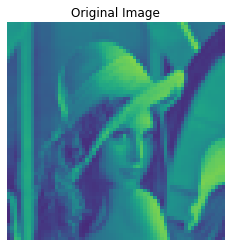

In [69]:
# read in the image, convert it to the right size 64x64 and plot for verification
im = cv2.imread('lena.png')
im = clr.rgb2gray(im)
im = uti.img_as_ubyte(trf.resize(im, (64,64)))

plt.imshow(im, vmin=0, vmax=255)
plt.title('Original Image')
plt.axis('off')

In [70]:
# chunk image procedure in blocks 4x4 and verify it works
blk_size = 4
n_blk = int(64/blk_size)
#fig, axs = plt.subplots(n_blk, n_blk)
#for i in range(n_blk**2):
#    axs[int(i//n_blk), int(i%n_blk)].imshow(im[blk_size*int(i//n_blk):blk_size*(int(i//n_blk)+1), blk_size*int(i%n_blk):blk_size*(int(i%n_blk)+1)], vmin=0, vmax=255)
#    axs[int(i//n_blk), int(i%n_blk)].axis('off')

(-0.5, 63.5, 63.5, -0.5)

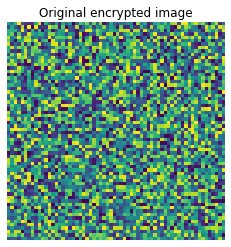

In [71]:
# Encryption of each 4x4 blocks (16 bytes of data) by AES-256 method and show encrypted image
enc_im = copy(im)
key = get_random_bytes(16)
cipher = AES.new(key, AES.MODE_EAX)
nonce =cipher.nonce
for i in range(n_blk**2):
    subim = im[blk_size*int(i//n_blk):blk_size*(int(i//n_blk)+1), blk_size*int(i%n_blk):blk_size*(int(i%n_blk)+1)]
    enc_im[blk_size*int(i//n_blk):blk_size*(int(i//n_blk)+1), blk_size*int(i%n_blk):blk_size*(int(i%n_blk)+1)] = np.reshape(np.frombuffer(cipher.encrypt(subim.tobytes()), dtype = subim.dtype), subim.shape)
plt.imshow(enc_im, vmin=0, vmax=255)
plt.title('Original encrypted image')
plt.axis('off')

In [72]:
# model your attack here

N,M = enc_im.shape
# # Modify the encrypted image from a single bits


# modifiedPosition = [random.randint(1,N),random.randint(1,M)] 
# randomValue = random.randint(0,255)
# enc_im[modifiedPosition[0],modifiedPosition[1]] = randomValue


## Attack with white gaussian noise
# def generateGaussianNoise(mean,std,N,M): #Generate a Gaussian Noise array NxM
#     return np.asarray([np.random.normal(mean,std,M) for i in range(N)])

# noise = generateGaussianNoise(0,0.1,N,M)
# enc_im = skimage.img_as_float(enc_im)
# enc_im = enc_im + noise
# enc_im = np.asarray([ [round(enc_im[i][j]*255) for j in range(M)] for i in range(N) ])
# enc_im = enc_im.astype(np.uint8)

# plt.imshow(enc_im, vmin=0, vmax=255)
# plt.title('Noised Encrypted image with sigma = 0.1')
# plt.axis('off')

(-0.5, 63.5, 63.5, -0.5)

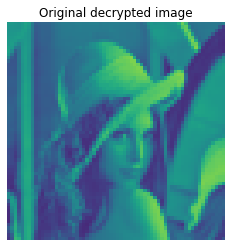

In [73]:
# Decryption and show decrypted image
dec_im = copy(enc_im)
cipher = AES.new(key, AES.MODE_EAX, nonce=nonce)
for i in range(n_blk**2):
    subim = enc_im[blk_size*int(i//n_blk):blk_size*(int(i//n_blk)+1), blk_size*int(i%n_blk):blk_size*(int(i%n_blk)+1)]
    dec_im[blk_size*int(i//n_blk):blk_size*(int(i//n_blk)+1), blk_size*int(i%n_blk):blk_size*(int(i%n_blk)+1)] = np.reshape(np.frombuffer(cipher.decrypt(subim.tobytes()), dtype = subim.dtype), subim.shape)
plt.imshow(dec_im, vmin=0, vmax=255)
plt.title('Original decrypted image')
plt.axis('off')